## Final Project Submission

Please fill out:
* Student name: Stanoff Kipkirui
* Student pace:  full time
* Scheduled project review date/time: 03/07/2023 to 09/07/2023
* Instructor name:Veronica Isiaho 
* Blog post URL:


    
    **USE OF MULTIPLE LINEAR REGRESSION MODELING TO ANALYZE HOUSE SALES IN KING COUNTY**
                        

**INTRODUCTION**

In this data science project, we aim to build a multiple linear regression model to predict house sale prices in King County, leveraging the King County House Sales dataset. The project's objective is to provide accurate estimates of property values to homeowners and potential buyers, enabling informed decision-making in the real estate market.

**BUSINESS UNDERSTANDING**

The real estate agency needs to understand the relationship between various features of the houses and their sale prices in order to provide accurate advice to homeowners. By performing multiple linear regression analysis on the King County House Sales dataset, the agency can identify which home renovation factors significantly impact the sale price.

**DATA UNDERSTANDING**

The King County House Sales dataset contains comprehensive information about house sales, including features such as the number of bedrooms, number of bathrooms, square footage of living space in the home, number of floors in the house, how good the overall condition of the house is, overall house grade which is related to design and construction, and year when the house was built. To better understand the dataset, we will perform exploratory data analysis, examine distributions, identify correlations, and assess feature importance.

**DATA GATHERING**

Since we are using python programming language for data science we need to import python packages that will be utilized in this study and then load the datasets relevant for our study.

In [1]:
#python packages that will be utilized in this project
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

https://www.kaggle.com/code/vishnuramachandran/data-analysis-python-house-sales-in-king-county

In [2]:
#load King County House Sale dataset

data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#get summary statistics for our dataset
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**DATA CLEANING AND PREPARATION**

This involves checking data to check if there exists any possible problems that makes data unsuitable for analysis.The problems may include missing data , duplicated data , handling categorical variables and obtaining the relevant subset from our dataset  that are likely to have a significant impact on the target variable.Data cleaning and preparation done in our datasets include checking for missing values, dropping unnecessary columns, getting rid of duplicates,handling categorical variables and creating new dataframes that suit our study including subsetting our datasets.Each datacleaning process is described in details in each cell based on the dataset.

Feature Selection:
    
Selection of relevant features that are likely to have a significant impact on the target variable (sale price) has been done. Consider both numerical and categorical variables based on domain knowledge and correlation analysis. Drop any unnecessary or redundant columns.I will focus on a subset of the overall dataset.These features are:

price: sale price which is our prediction target

bedrooms: number of bed rooms in the house

bathrooms: number of bathrooms in the house

sqft_living: square footage of living space in the home

sqft_lot: square footage of the lot

floors: number of floors or the levels in the house

waterfront: whether the house is located on a water front

grade: overall house grade in relation to design and construction


In [4]:
data_subset =  data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade']].copy()
data_subset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
0,221900.0,3,1.00,1180,5650,1.0,NaN,7 Average
1,538000.0,3,2.25,2570,7242,2.0,NO,7 Average
2,180000.0,2,1.00,770,10000,1.0,NO,6 Low Average
3,604000.0,4,3.00,1960,5000,1.0,NO,7 Average
4,510000.0,3,2.00,1680,8080,1.0,NO,8 Good
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,NO,8 Good
21593,400000.0,4,2.50,2310,5813,2.0,NO,8 Good
21594,402101.0,2,0.75,1020,1350,2.0,NO,7 Average
21595,400000.0,3,2.50,1600,2388,2.0,NaN,8 Good


In [5]:
#get summary statistics for our dataset
data_subset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000


In handling missing values we can observe from the summary statistics that the count for each column is 21597 which gives an implication that we do not have any missing data. So we are certain that we have evaded the dangers of performing multiple linear regression with missing data.Handling missing values before performing multiple linear regression is essential to ensure unbiased and accurate results, preserve sample size and statistical power, maintain data integrity, fulfill the assumptions of linear regression, enhance model performance, and enable fair comparisons and generalizability of the findings.



Checking for duplicates:
    
Duplicate observations can affect the regression model's results, as they may introduce bias and impact the statistical properties of the model.So we first check for duplicates and drop the duplicates but keep the first occurence.By dropping the duplicates, we ensure that each observation in our dataset is unique, which is important for reliable and accurate analysis in multiple linear regression.

In [6]:
#  First heck for duplicates
duplicate_rows = data_subset.duplicated()
num_duplicates = duplicate_rows.sum()
num_duplicates
# Display the duplicate rows 
duplicate_data = data_subset[duplicate_rows]
#print("Duplicate rows:")
print(duplicate_data)
# Drop duplicates and keep the first occurrence
data_subset.drop_duplicates(keep='first', inplace=True)

# Verify if duplicates have been dropped
num_duplicates = data_subset.duplicated().sum()
num_duplicates

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4348   259950.0         2       2.00         1070       649     2.0   
14969  585000.0         3       2.50         2290      5089     2.0   
17228  629950.0         3       2.50         1680      1683     2.0   
20038  555000.0         3       2.50         1940      3211     2.0   
20508  529500.0         3       2.25         1410       905     3.0   
21458  359800.0         5       2.50         2170      2752     2.0   
21518  599000.0         3       1.75         1650      1180     3.0   

      waterfront     grade  
4348          NO  9 Better  
14969         NO  9 Better  
17228         NO  9 Better  
20038         NO    8 Good  
20508         NO  9 Better  
21458         NO    8 Good  
21518         NO    8 Good  


0

Handling Categorical Variables:

First we inspect pandas data types in our dataset to know whethervwe will use all te columns.Object data type cannot be used because the model will crash.Convert categorical variables into numerical representations using technique called one-hot encoding. This ensures that the data can be properly utilized in the regression model.

In [7]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21590 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21590 non-null  float64
 1   bedrooms     21590 non-null  int64  
 2   bathrooms    21590 non-null  float64
 3   sqft_living  21590 non-null  int64  
 4   sqft_lot     21590 non-null  int64  
 5   floors       21590 non-null  float64
 6   waterfront   19214 non-null  object 
 7   grade        21590 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [8]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_subset, columns=['waterfront','grade'])
data_encoded


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_NO,waterfront_YES,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,1,0,0,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,1,0,0,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
# Standardization using z-score normalization
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(data_encoded)
#data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)


Our data is now clean and ready for analysis

**MODELING AND DATA ANALYSIS**

We have to inspect the relationship between the other variables and prediction target which is price.


In [10]:
data_subset.corr()["price"]

C:\Users\PC\AppData\Local\Temp\ipykernel_12308\3796630657.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_subset.corr()["price"]


price          1.000000
bedrooms       0.308835
bathrooms      0.525933
sqft_living    0.701938
sqft_lot       0.089868
floors         0.256948
Name: price, dtype: float64

Correlation is a measure related to regression modeling, we can see that there seems to be some relevant signal here, with lots of variables that have medium-to-strong correlations with price.We can also visualize the relationship between other features and the target variable.For each feature in the subset, create a scatter plot that shows the feature on the x-axis and price on the y-axis.

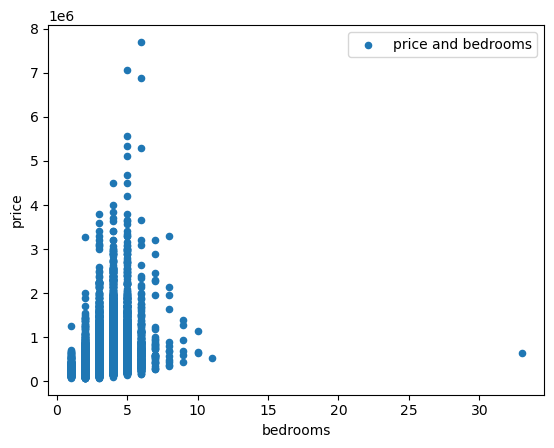

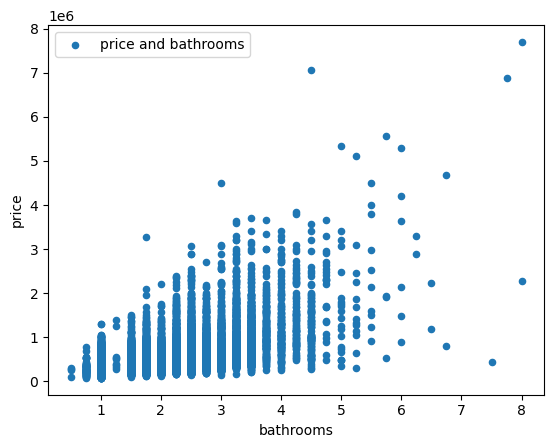

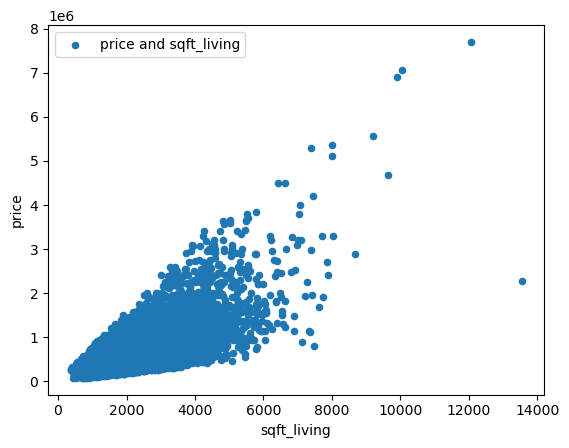

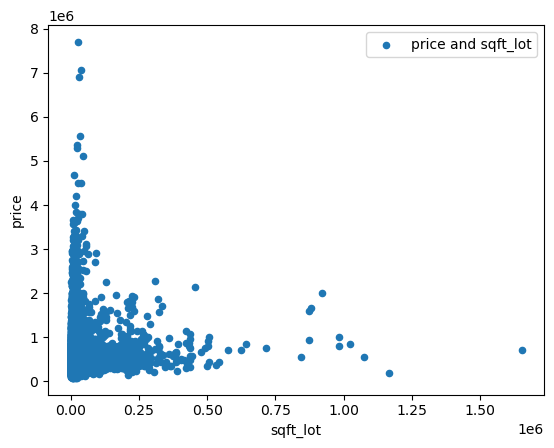

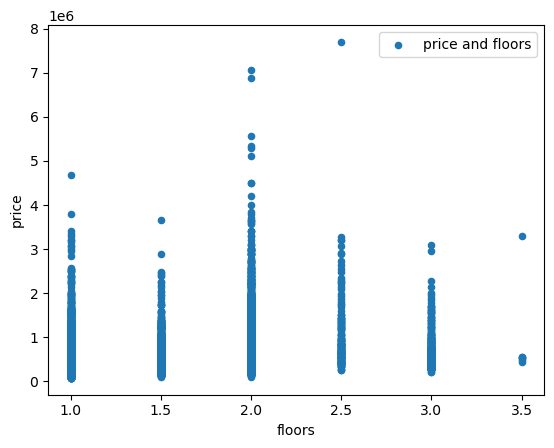

In [11]:
# Your code here - import relevant library, create scatter plots
data_subset.plot.scatter(x = "bedrooms" ,y = "price", label = "price and bedrooms");
data_subset.plot.scatter(x = "bathrooms" ,y = "price", label = "price and bathrooms");
data_subset.plot.scatter(x = "sqft_living" ,y = "price", label = "price and sqft_living")
data_subset.plot.scatter(x = "sqft_lot" ,y = "price", label = "price and sqft_lot");
data_subset.plot.scatter(x = "floors" ,y = "price", label = "price and floors");

**Start with a simple linear regression**

Regression models are evaluated against a "baseline". For simple linear regression, this baseline is an "intercept-only" model that just predicts the mean of the dependent variable every time. For multiple linear regression, we typically build a simple linear regression to be that baseline.

Since sqft_living is the feature with the strongest correlation, we will  build a simple linear regression with that.

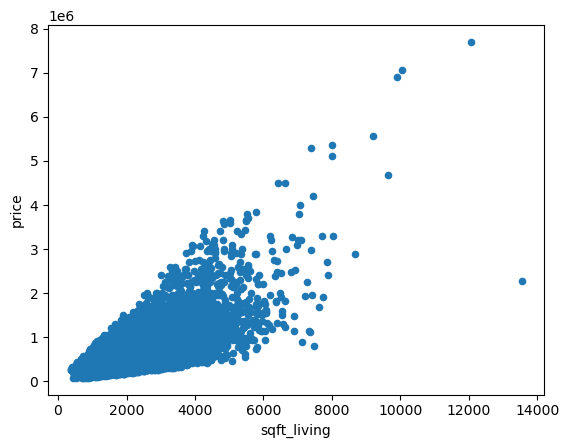

In [12]:
data_subset.plot.scatter(x="sqft_living", y="price");

In [13]:
y = data_subset["price"]
X_baseline = data_subset[["sqft_living"]]

In [14]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:47:51   Log-Likelihood:            -2.9997e+05
No. Observations:               21590   AIC:                         5.999e+05
Df Residuals:                   21588   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.404e+04   4411.016     -9.985      

From the parameters obtained we have observed that the intercept is an impossible value resulting from square footage of living space in the hom of 0 .We have to perform zero centering to improve intercept readability where we shift the predictors so that a value of zero represents the mean rather than representing zero.

In [15]:
x_centred = X_baseline.copy()
for col in x_centred.columns:
    x_centred[col] = x_centred[col] - x_centred[col].mean()
x_centred.describe()    

,sqft_living
count,2.159000e+04
mean,-7.818537e-14
std,9.182073e+02
min,-1.710431e+03
25%,-6.504308e+02
50%,-1.704308e+02
75%,4.695692e+02
max,1.145957e+04


In [16]:
centred_model = sm.OLS(y, sm.add_constant(x_centred))
centred_results = centred_model.fit()
centred_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:47:51   Log-Likelihood:            -2.9997e+05
No. Observations:               21590   AIC:                         5.999e+05
Df Residuals:                   21588   BIC:                         6.000e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.403e+05   1781.030    303.369      0.000    5.37e+05    5.44e+05
sqft_living   280.8800      1.940    144.804      0.000     277.078     284.682
==============================================================================
Omnibus:                    14796.176   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542247.663
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.895   Cond. No.                         918.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The resulting regression line found is:
    
price = 540308.795646 + 280.880026sqft_living

Generally,the model is statistically significant overall, with an F-statistic p-value less than o.o5.

The model also explains about 49 % of the variance in price.

Besides, the model coefficients (const and sqft_living) are both statistically significant , with t-statistic p-values under 0.05.

For an increase in in 1 square foot of the living space in the home ,there exists an associated increase in price of 540,309 dollars.

**Simple Linear Regression Visualization**

We'll also plot the actual vs. predicted values:

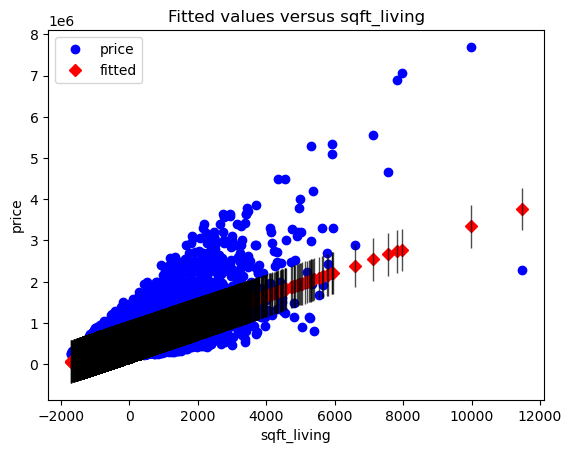

In [17]:
sm.graphics.plot_fit(centred_results, "sqft_living")
plt.show()

    The regression line:

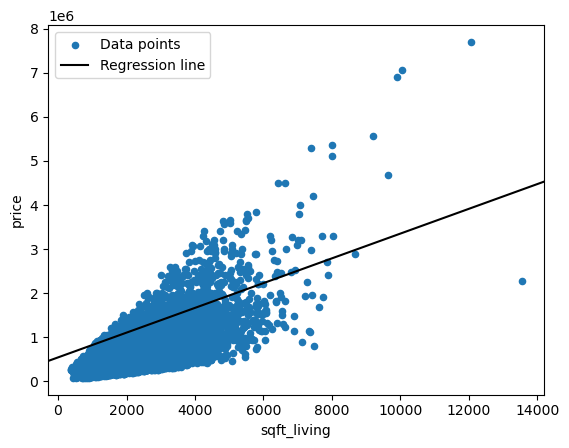

In [18]:
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=centred_results, label="Regression line", ax=ax, color="black")
ax.legend();

And the residuals:

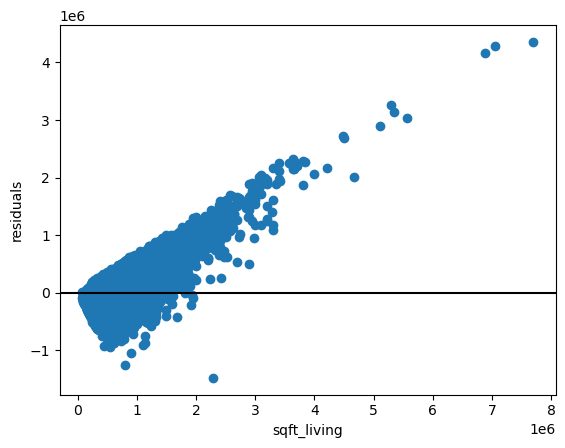

In [19]:
fig, ax = plt.subplots()

ax.scatter(data_subset["price"], centred_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

**Multiple Regression with Many Features**

We are now creating  a model that uses all the columns from our sub setted data set that will help us evaluate the price of houses in King County.

In [20]:
y = data_subset["price"]
x = data_subset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'grade']]
x = pd.get_dummies(x, columns = ["waterfront", "grade"], drop_first = True)
x


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,1180,5650,1.0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0,0,0,0,0,0,0,0,1,0,0
2,2,1.00,770,10000,1.0,0,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,0,0,0,0,0,0,0,0,1,0,0
4,3,2.00,1680,8080,1.0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,2310,5813,2.0,0,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1020,1350,2.0,0,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,1600,2388,2.0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2176.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:47:57   Log-Likelihood:            -2.9692e+05
No. Observations:               21590   AIC:                         5.939e+05
Df Residuals:                   21573   BIC:                         5.940e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.85e+05   1.33e+04     43.952      0.000    5.59e+05    6.11e+05
bedrooms             -1.89e+04   2169.701     -8.712      0.000   -2.32e+04   -1.46e+04
bathrooms              83.2504   3459.383      0.024      0.981   -6697.396    6863.897
sqft_living           170.1378      3.541     48.043      0.000     163.197     177.079
sqft_lot               -0.3657      0.038     -9.562      0.000      -0.441      -0.291
floors              -2.499e+04   3488.984     -7.162      0.000   -3.18e+04   -1.81e+04
waterfront_YES       7.953e+05   1.91e+04     41.647      0.000    7.58e+05    8.33e+05
grade_11 Excellent   2.685e+05   1.35e+04     19.925      0.000    2.42e+05    2.95e+05
grade_12 Luxury      7.451e+05   2.57e+04     28.967      0.000    6.95e+05    7.96e+05
grade_13 Mansion     2.003e+06   6.45e+04     31.056      0.000    1.88e+06    2.13e+06
grade_3 Poor        -3.629e+05   2.28e+05     -1.594      0.111   -8.09e+05    8.33e+04
grade_4 Low         -4.272e+05    4.5e+04     -9.492      0.000   -5.15e+05   -3.39e+05
grade_5 Fair        -4.359e+05   1.77e+04    -24.606      0.000   -4.71e+05   -4.01e+05
grade_6 Low Average -4.067e+05   1.09e+04    -37.368      0.000   -4.28e+05   -3.85e+05
grade_7 Average     -3.736e+05   9026.119    -41.387      0.000   -3.91e+05   -3.56e+05
grade_8 Good        -3.057e+05   8307.143    -36.800      0.000   -3.22e+05   -2.89e+05
grade_9 Better       -1.81e+05   8311.917    -21.772      0.000   -1.97e+05   -1.65e+05
==============================================================================
Omnibus:                    11438.704   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260724.303
Skew:                           2.064   Prob(JB):                         0.00
Kurtosis:                      19.516   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
results.params

const                  5.849896e+05
bedrooms              -1.890175e+04
bathrooms              8.325041e+01
sqft_living            1.701378e+02
sqft_lot              -3.657163e-01
floors                -2.498776e+04
waterfront_YES         7.952743e+05
grade_11 Excellent     2.684861e+05
grade_12 Luxury        7.451221e+05
grade_13 Mansion       2.003131e+06
grade_3 Poor          -3.628868e+05
grade_4 Low           -4.271565e+05
grade_5 Fair          -4.359183e+05
grade_6 Low Average   -4.067102e+05
grade_7 Average       -3.735668e+05
grade_8 Good          -3.056987e+05
grade_9 Better        -1.809638e+05
dtype: float64

**Multiple linear regression results**


In analysing the results of ou  multiple regression model, we can look at the F-statistic p-value to see if it's statistically significant and at the adjusted R-Squared to see the proportion of variance explained (around 62%).

The p value (0.00) is less than 0.05 thus we reject the null hypothesis and conclude that the model is statistically significant overall.

Our R-squared value is equal to 0.617 ,this means that the proportion of variance explained by our model out of the total variance is about 62%.This simply means 62% of the variation in price is explained by our model.

 Here's a detailed analysis of the results:

const (5.849896e+05): This represents the intercept or constant term in the regression equation. This indicates the estimated average price when all other predictors are kept constant.

bedrooms (-1.890175e+04): A negative coefficient suggests that an increase in the number of bedrooms is associated with a decrease in price, holding other variables constant. This coefficient value indicates the estimated change in price for each additional bedroom.

bathrooms (8.325041e+01): A positive coefficient implies that an increase in the number of bathrooms is associated with an increase in price, assuming other variables remain constant. This coefficient value indicates the estimated change in price for each additional bathroom.

sqft_living (1.701378e+02): This coefficient represents the estimated change in price for each additional square foot of living space. A positive coefficient implies that larger living area tends to be associated with higher prices.

sqft_lot (-3.657163e-01): The negative coefficient suggests that an increase in the lot size is associated with a decrease in price, assuming other variables are held constant. This coefficient value represents the estimated change in price for each additional square foot of lot size.

floors (-2.498776e+04): A negative coefficient indicates that an increase in the number of floors is associated with a decrease in price, holding other variables constant. This coefficient value represents the estimated change in price for each additional floor.

waterfront_YES (7.952743e+05): This coefficient represents the estimated price increase for properties with a waterfront compared to those without. A positive coefficient suggests that having a waterfront view tends to be associated with higher prices.

grade_11 Excellent (2.684861e+05), grade_12 Luxury (7.451221e+05), grade_13 Mansion (2.003131e+06): These coefficients represent the estimated price differences for properties with different grades compared to a reference category (possibly grade_1 or another reference grade). Higher grade levels are associated with higher prices.

grade_3 Poor to grade_9 Better: These coefficients represent the estimated price differences for properties with different grade levels compared to the reference category (grade_1 or another reference grade). Negative coefficients (e.g., grade_3 Poor) suggest lower prices compared to the reference category, while positive coefficients (e.g., grade_9 Better) suggest higher prices.

Overall, these coefficients provide insight into the relationship between each predictor variable and the target variable (price) in the multiple linear regression model. They indicate the estimated change in price associated with a unit change in each predictor, assuming other variables are held constant. The signs and magnitudes of the coefficients help identify the direction and strength of these associations.


**Multiple linear regression visualization**

We will continue plotting partial regression plots,